<a href="https://colab.research.google.com/github/PuroshotamSingh/Book-Recommendation-System/blob/main/Book_Recommendation_System_Puroshotam_Kumar_Singh_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
<br>
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).<br>
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. **The main objective is to create a book recommendation system for users.**

# **Dataset information**

The Book-Crossing dataset comprises 3 files.<br>
● **Users** :<br>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.<br>
● **Books** : <br>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.<br>
● **Ratings** :<br> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

# **Importing libraries**

In [1]:
# Importing libraries

import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# To supress the warning messages

import warnings
warnings.filterwarnings('ignore')


# **Dataset initialization**

### **Loading Users data.**

In [2]:
# Loading Users data and creating dataframe

users = pd.read_csv('/content/drive/MyDrive/Copy of Users.csv')

In [3]:
# Printing first 10 rows of users dataframe

users.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [4]:
# Shape of dataset

users.shape

(278858, 3)

* **Number of instances: 278858**
* **Number of attributes: 3**

In [5]:
# Columns of users data

users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

* **In our users dataset, there are three features; User_ID, Location and Age.**

### **Loading Books data.**

In [6]:
# Loading Books data

books = pd.read_csv('/content/drive/MyDrive/Copy of Books.csv')

In [7]:
# Let's see first 3 rows of books dataset

books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [8]:
# Shape of dataset

books.shape

(271360, 8)

* **Number of instances: 271360**
* **Number of attributes: 8**

In [9]:
# Columns of books data

books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

* **In our books dataset, there are 8 features; 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'.**

### **Loading Ratings data.**

In [10]:
# Ratings data

ratings = pd.read_csv('/content/drive/MyDrive/Copy of Ratings.csv')

In [11]:
# Let's see first 5 rows of ratings dataset

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
# Shape of dataset

ratings.shape

(1149780, 3)

* **Number of instances: 1149780**
* **Number of attributes: 3**

In [13]:
# Columns of ratings data

ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

* **In our ratings dataset, there are three features; User_ID, ISBN and Book_Rating.**

# **EDA on Users dataset**

### **Let's check for null values.**

In [14]:
# Checking for total null values in each column

users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [15]:
# Percentage of null values in each column

print(100*(users.isnull().sum()/len(users.index)).sort_values(ascending=False))

Age         39.719857
Location     0.000000
User-ID      0.000000
dtype: float64


* **Age column have around 40% null values.**

**Let's check the distribution of Age column.**

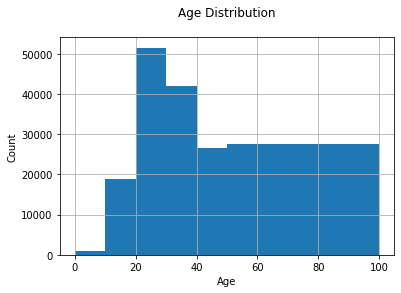

In [16]:
# Histplot showing distribution of age

users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**The most active users fall in the range of 20-30s.**

### **Let's check for outliers in Age column.**

Text(0.5, 1.0, 'Boxplot of Age column')

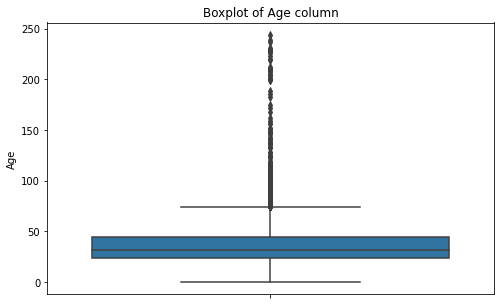

In [17]:
# Plotting boxplot for age column

plt.figure(figsize=(8,5))
sns.boxplot(y='Age', data=users)
plt.title('Boxplot of Age column')

In [18]:
# Descriptive stats of Age column

users.Age.describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

* **From boxplot as well as descriptive stats, it is clear that maximum value of age is 244.**
* **So, there are outliers in Age column.**

### **Let's clean Age column**

Text(0.5, 1.0, 'Age Distribution Plot')

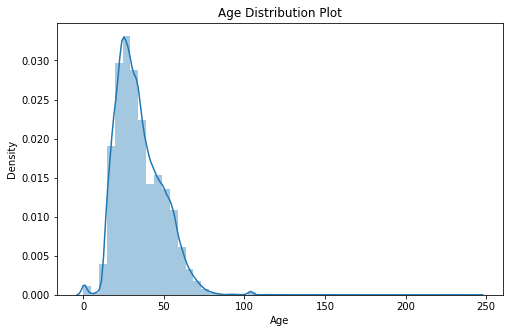

In [19]:
# Displot of Age column

plt.figure(figsize=(8,5))
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

* **Age below 5 and above 100 do not make much sense for our book rating case.**
* **So, we can replace these by NaNs.**

In [20]:
# Replacing outlier data with NaN

users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

**Now let's again check for null values**

In [21]:
# Total no. of null values in users data

users.isna().sum()

User-ID          0
Location         0
Age         112010
dtype: int64

**Replacing NaN values with mean**

In [22]:
# Replacing Nan values with mean

users.Age = users.Age.fillna(users.Age.mean())

In [23]:
# Let's see total no of null values again

users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

**Great! We have impute all null values.**

**After cleaning let's see the distribution of Age column again**

Text(0.5, 1.0, 'Age Distribution Plot')

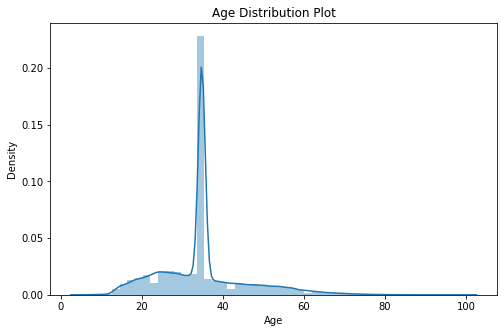

In [24]:
# Distplot to see distribution of Age after cleaning

plt.figure(figsize=(8,5))
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

**Nice! We have treated outliers and also imputed null values.**

### **Location column**

* **Let's see unique values in location column.**

In [25]:
# Printing unique values of location column

users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

* **Location column contains some special characters.**
* **Let's clean this column and also create a new column 'Country'.**

In [26]:
# Creating column Country

for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

**Drop location column from dataset.**

In [27]:
# dropping location column

users.drop('Location',axis=1,inplace=True)

In [28]:
# Converting location column into string datatype

users['Country']=users['Country'].astype('str')

In [29]:
# Extracting elements of Country column

a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

* **Here, we can see that some data has misspellings. So, let's correct them.**

In [30]:
# Replacing incorrect words with correct one

users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

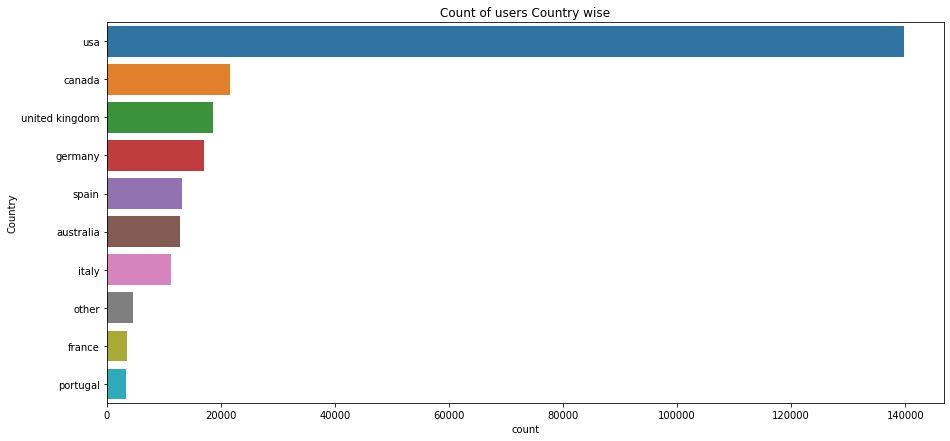

In [31]:
# Barplot to show count of users as per country

plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

* **Most number of users are from USA followed by Canada and United Kingdom.**

In [32]:
# Checking no. of null values in Users dataset.

users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

**Great! We have done EDA as well as cleaning of Users dataset.**

# **EDA on Books dataset**

**Let's have a look at books dataset again.**

In [33]:
# Printing top 3 rows of books dataset.

books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


* **Last three columns contain image URLs which will not be required for analysis.**

* **So, let's drop these columns.**

In [34]:
# Dropping last three columns

books.drop(list(books.columns)[-3:], axis=1, inplace=True)

In [35]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### **Let's find top 10 authors who have written the maximum number of books.**

Text(0.5, 1.0, 'Top 10 Authors')

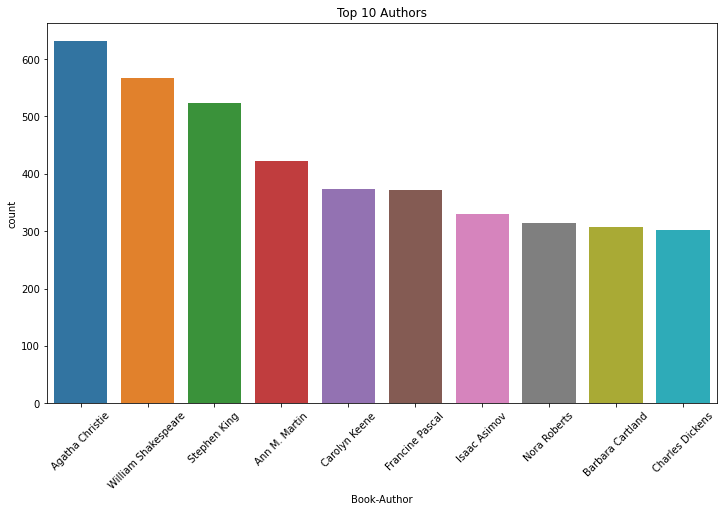

In [44]:
# Barplot to show top 10 authors

plt.figure(figsize=(12,7))
chart = sns.countplot(x='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Top 10 Authors')

* **Agatha Christie had written maximum number of books followed by William Shakespeare and Stephen King.**

### **Let's find top 10 publishers who have published maximum number of books.**

Text(0.5, 1.0, 'Top 10 Publishers')

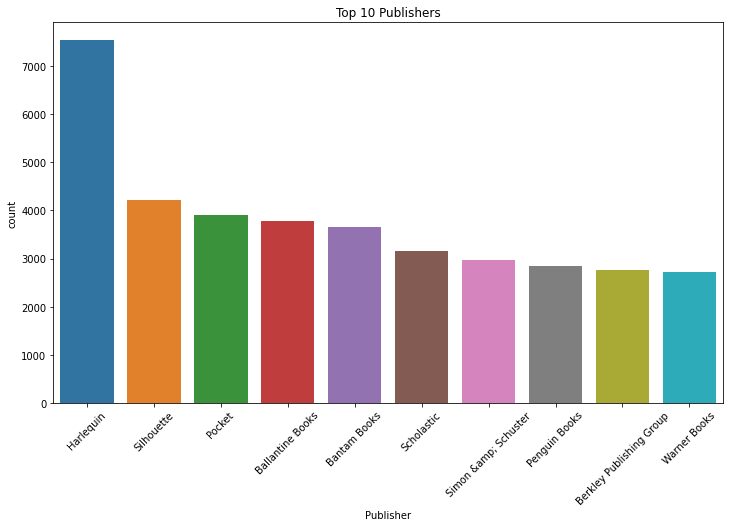

In [47]:
# Barplot to show top 10 publishers.

plt.figure(figsize=(12,7))
chart = sns.countplot(x='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Top 10 Publishers')

* **Harleyquin had published maximum number of books followed by Silhouette.**

### **Year-of-Publication column**

In [49]:
# Printing unique values of location column

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

**Points to note:**
> * **Year-of-Publication column contains some name of publishers.**
> * **Also, some values are int and some values are string.**



**So, let's convert all of them into string datatype**

In [50]:
# Converting all values into string

books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')

### **Now let's clean Year-of-Publication column**

In [51]:
# Investigating the rows having 'DK Publishing Inc' as yearOfPublication

books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...
